# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D  #para proyecciones en 3D
import ipywidgets as widgets
from IPython.display import display

# Cargar DataFrame

In [2]:
file = "../pmsm_temperature_data.csv"
df = pd.read_csv(file)
df.head()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4


# Dividir dataset

In [3]:
X = df.drop("pm", 1)
bins=np.linspace(min(df["pm"]),max(df["pm"]),4)
names=[1,2,3]
df["pm"]=pd.cut(df["pm"],bins,labels=names)
y= df["pm"]
data = ['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'torque', 'i_d',
       'i_q', 'stator_yoke', 'stator_tooth', 'stator_winding', 'profile_id']
X_centrado = X[data]-X[data].mean(axis=0)

In [4]:
def varianza(var1, var2=None): #si recibe una variable calcula la varianza, si recibe 2 variables calcula la covarianza entre dichas variables
    if var2 is None:
        var2 = var1
    assert var1.shape == var2.shape  #devuelve booleano, si es true continua, si es false para el programa y arroja un error
    var1_mean = var1.mean()
    var2_mean = var2.mean()
    return np.sum((var1 - var1_mean) * (var2 - var2_mean)) / (var1.shape[0] - 1)

In [5]:
import numpy as np
cov_mat = np.cov(m=X_centrado.T)
cov_mat

array([[ 9.86300805e-01,  4.32494787e-01,  1.93005042e-01,
         8.70310410e-02,  7.78404221e-02, -2.59916174e-01,
         5.56047815e-03, -2.58230851e-01,  4.48982998e-01,
         3.93856595e-01,  2.99311687e-01,  8.43019799e+00],
       [ 4.32494787e-01,  1.00485264e+00,  1.78761322e-01,
         2.79838454e-02, -3.34533704e-02, -1.89678869e-01,
         1.08642049e-01, -1.86121348e-01,  8.77074028e-01,
         6.90395090e-01,  5.09685941e-01,  1.10559849e+01],
       [ 1.93005042e-01,  1.78761322e-01,  9.95760865e-01,
        -2.74776268e-02, -2.33618909e-01, -8.17866564e-01,
         3.57396729e-01, -7.93236133e-01,  4.13838061e-02,
        -6.60889658e-02, -1.50144593e-01,  6.62486546e+00],
       [ 8.70310410e-02,  2.79838454e-02, -2.74776268e-02,
         1.00466581e+00,  7.19451323e-01, -3.72708527e-02,
        -1.82095355e-01, -2.63547055e-02,  1.06545596e-01,
         1.49304332e-01,  1.25529272e-01, -2.70494308e+00],
       [ 7.78404221e-02, -3.34533704e-02, -2.3361890

In [6]:
val_propios, vec_propios = np.linalg.eig(cov_mat)
print('Vectores propios: \n', vec_propios)
print('\nValores propios: \n', val_propios)

Vectores propios: 
 [[ 1.73546294e-02 -1.58627930e-01 -2.06796407e-01 -8.04098677e-02
  -2.90104693e-01 -9.13652127e-01  5.77494258e-02 -4.96816826e-02
  -3.40772944e-03 -2.30950586e-02  5.20506440e-03  3.03321233e-03]
 [ 2.27622652e-02 -2.56433161e-01 -1.78559828e-01 -3.56611710e-01
  -2.82859082e-01  2.02683765e-01 -5.57060786e-01 -4.07103196e-01
  -9.73004786e-02 -3.84051382e-01 -1.41569115e-01 -2.28916505e-02]
 [ 1.36446355e-02  1.79126697e-01 -4.85690893e-01 -1.13291561e-03
   8.49688237e-02  1.17967350e-01  5.01714024e-01 -6.43245713e-01
   2.06775400e-01  1.03728153e-02 -1.00643916e-02  4.74084804e-02]
 [-5.54519443e-03 -1.92946096e-01 -1.14624835e-01  5.07728426e-01
  -6.23310864e-01  2.26973583e-01  2.42006606e-01  3.99166168e-02
  -4.37377099e-01  1.13884770e-02 -1.33642626e-02  3.61175157e-03]
 [-7.53476056e-03 -3.27944491e-01 -4.82566198e-02  5.68400877e-01
  -1.91718047e-02  8.73689980e-03 -2.52841227e-01 -2.87057340e-02
   7.03562141e-01 -6.69133243e-02  4.56787641e-02  1

In [7]:
orden_componentes = np.argsort(val_propios)[::-1]
val_propios_ordenados = val_propios[orden_componentes]
vec_propios_ordenados = vec_propios[orden_componentes]
print('Vectores propios(ordenados): \n', vec_propios_ordenados)
print('\nValores propios(ordenados): \n', val_propios_ordenados)


Vectores propios(ordenados): 
 [[ 1.73546294e-02 -1.58627930e-01 -2.06796407e-01 -8.04098677e-02
  -2.90104693e-01 -9.13652127e-01  5.77494258e-02 -4.96816826e-02
  -3.40772944e-03 -2.30950586e-02  5.20506440e-03  3.03321233e-03]
 [ 2.27622652e-02 -2.56433161e-01 -1.78559828e-01 -3.56611710e-01
  -2.82859082e-01  2.02683765e-01 -5.57060786e-01 -4.07103196e-01
  -9.73004786e-02 -3.84051382e-01 -1.41569115e-01 -2.28916505e-02]
 [ 1.36446355e-02  1.79126697e-01 -4.85690893e-01 -1.13291561e-03
   8.49688237e-02  1.17967350e-01  5.01714024e-01 -6.43245713e-01
   2.06775400e-01  1.03728153e-02 -1.00643916e-02  4.74084804e-02]
 [-5.54519443e-03 -1.92946096e-01 -1.14624835e-01  5.07728426e-01
  -6.23310864e-01  2.26973583e-01  2.42006606e-01  3.99166168e-02
  -4.37377099e-01  1.13884770e-02 -1.33642626e-02  3.61175157e-03]
 [-7.53476056e-03 -3.27944491e-01 -4.82566198e-02  5.68400877e-01
  -1.91718047e-02  8.73689980e-03 -2.52841227e-01 -2.87057340e-02
   7.03562141e-01 -6.69133243e-02  4.5678

# PCA

In [8]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_centrado)

In [9]:
pca.components_

array([[-0.01735463, -0.02276227, -0.01364464,  0.00554519,  0.00753476,
         0.01169857, -0.00645065,  0.0116386 , -0.01813037, -0.0127987 ,
        -0.00828905, -0.99901544],
       [ 0.15862793,  0.25643316, -0.1791267 ,  0.1929461 ,  0.32794449,
         0.11854881, -0.33213794,  0.1084814 ,  0.40609827,  0.46045639,
         0.46788851, -0.01496201]])

In [10]:
pca.explained_variance_ratio_

array([0.97987694, 0.00749131])

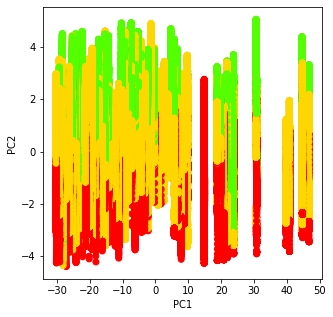

In [11]:
fig = plt.figure(figsize=(5,5))
plt.xlabel("PC1", size = 10)
plt.ylabel("PC2", size = 10)
plt.scatter(X_pca[:,0], X_pca[:,1],c=y, cmap = plt.cm.prism)
plt.show()
